# Nonnegative Matrix Factorisation
#### Dan Jacobellis
#### CSE 392 - Parallel Algorithms
#### Project Proposal

## Introduction
Suppose we have a matrix $\bf V$ containing nonnegative data; for example, the magnitude image of a time-frequency decomosition of an audio recording.

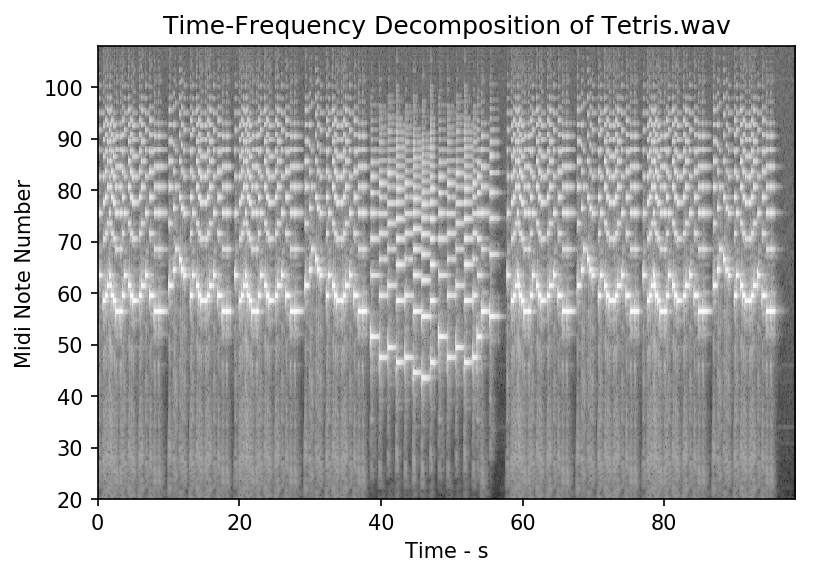

In [4]:
import numpy as np
import matplotlib.pyplot as plt
TFd = np.load("TFd.npy")
plt.figure(dpi = 150, figsize=(6,4))
extent=[0, 98.5, 20, 108]
plt.imshow(TFd, origin='lower', extent=extent, \
           interpolation='none', aspect='auto', cmap='gray')
plt.xlabel('Time - s')
plt.ylabel('Midi Note Number')
plt.title('Time-Frequency Decomposition of Tetris.wav');

 The problem of nonnegative matrix factorisation (NMF) amounts to factorising $\bf V$ into two factors $\bf W$ and $\bf H$ which are also nonnegative. That is,

$$ \bf V \approx \hat {\bf V} = \bf W \bf H$$

This technique can be used to learn recurring patterns in the data matrix. In this case, $\bf W$ represents a learned dictionary and the $\bf H$ represent represents the decomposition. When applied to the time-frequency decomposition of a music recording, $\bf W$ contain the learned spectral envelopes of each instrument in the recording and $\bf H$ contains a transcription of the music.

Many variations of NMF algorithms are well-established, and several libraries are available, such as `decomposition.nmf()` in scikit-learn. For the class project, We propose implementing parallel versions of these algorithms:

* To learn about NMF algorithms, which are currently an open field of research
* To gain experience and intuition for different parallel programming models by implimenting NMF using shared memory, message passing, and GPU programming
* To learn about implementation of iterative algorithms with high data parallelism
* To improve upon the performance and functionality of existing NMF libraries

## Description of Algorithm

The most widely used algorithms for NMF employ a multiplicative weight update method based on the pioneering work of Lee and Sung [3]. The algorithm consists of the following steps:

* Initialize $\bf W$ and $\bf H$ with non-negative values
* Iteratively update $\bf W$ and $\bf H$ using the following rules: ($n$ is the iteration)

$$
{\bf H}_{[i,j]}^{n+1}\leftarrow \frac
{\left( ({\bf W}^{n})^\top \bf V \right)_{[i,j]}}
{\left( ({\bf W}^n)^\top {\bf W}^n {\bf H}^n \right)_{[i,j]}}
$$

$$
{\bf W}_{[i,j]}^{n+1}\leftarrow \frac
{\left( {\bf V} ({\bf H}^{n+1})^\top \right)_{[i,j]}}
{\left( {\bf W}^n {\bf H}^{n+1} ({\bf H}^{n+1})^\top \right)_{[i,j]}}
$$

## Initial Performance Benchmarks

A test of the scikit-learn `decomposition.nmf()` implementation using the default parameters on a 90 second, single instrument audio recording provides a starting benchmarking for the algorithm. There are a few performance characterstics to note:

* On a workstation with twelve processors, one processor is fully utilized. The remaining processors are utilized at approximately 25%.
* The wall-clock run-time on the 90 second recording is approximately 2.5 hours.
* Each iteration takes about 7.0 seconds
* The number of iterations required scales rapidly as the converge tolerance is lowered.

In [5]:
import sklearn.decomposition
import time
model = sklearn.decomposition.NMF(n_components=264, max_iter=20, tol = 1e-4)
t1 = time.time()
W = model.fit_transform(TFd - np.min(TFd))
H = model.components_
t2 = time.time()
print(t2-t1)

13.925910472869873


## Existing Parallel Implementations

GPU implementations are available, with most targeting bioinformatics applications

## References

[1\] S. Makino, Ed., [Audio source separation][1]. New York, NY: Springer Berlin Heidelberg, 2018.

[2\] E. Vincent, T. Virtanen, and S. Gannot, [Audio source separation and speech enhancement][2]. 2018.

[1]:http://ezproxy.lib.utexas.edu/login?url=http://link.springer.com/10.1007/978-3-319-73031-8

[2]:http://ezproxy.lib.utexas.edu/login?url=https://onlinelibrary.wiley.com/doi/book/10.1002/9781119279860